# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID='+ weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | nova sintra
Processing Record 5 of Set 1 | skeldon
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | barah
Processing Record 12 of Set 1 | i-n-salah
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | utrik
Processing Record 16 of Set 1 | zaysan
Processing Record 17 of Set 1 | sacaba
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | tralee
Processing Record 21 of Set 1 | lengshuitan
Processing Record 22 of Set 1 | carnarvon
Processi

Processing Record 37 of Set 4 | beledweyne
Processing Record 38 of Set 4 | codrington
Processing Record 39 of Set 4 | ergani
Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | monticello
Processing Record 42 of Set 4 | booue
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | usogorsk
Processing Record 45 of Set 4 | talnakh
Processing Record 46 of Set 4 | greenville
Processing Record 47 of Set 4 | bredasdorp
Processing Record 48 of Set 4 | atherton
Processing Record 49 of Set 4 | baiti
Processing Record 0 of Set 5 | mount gambier
Processing Record 1 of Set 5 | baqubah
Processing Record 2 of Set 5 | victorica
Processing Record 3 of Set 5 | navia
Processing Record 4 of Set 5 | melfort
Processing Record 5 of Set 5 | stanley
Processing Record 6 of Set 5 | remire-montjoly
Processing Record 7 of Set 5 | vorgashor
Processing Record 8 of Set 5 | seversk
Processing Record 9 of Set 5 | yuzhno-kurilsk
Processing Record 10 of Set 5 | port alfred
Proce

Processing Record 30 of Set 8 | akureyri
Processing Record 31 of Set 8 | auki
Processing Record 32 of Set 8 | ta`u
Processing Record 33 of Set 8 | zouerate
Processing Record 34 of Set 8 | whakatane
Processing Record 35 of Set 8 | constitucion
Processing Record 36 of Set 8 | san carlos
Processing Record 37 of Set 8 | bandraboua
Processing Record 38 of Set 8 | bor
Processing Record 39 of Set 8 | al muwayh
Processing Record 40 of Set 8 | camiri
Processing Record 41 of Set 8 | vegreville
Processing Record 42 of Set 8 | sungai penuh
Processing Record 43 of Set 8 | okhotsk
Processing Record 44 of Set 8 | vila franca do campo
Processing Record 45 of Set 8 | coahuayana de hidalgo
Processing Record 46 of Set 8 | malchin
Processing Record 47 of Set 8 | rapar
Processing Record 48 of Set 8 | dapa
Processing Record 49 of Set 8 | sur
Processing Record 0 of Set 9 | puerto armuelles
Processing Record 1 of Set 9 | kavaratti
Processing Record 2 of Set 9 | pocahontas
Processing Record 3 of Set 9 | limass

Processing Record 18 of Set 12 | cill airne
Processing Record 19 of Set 12 | mahina
Processing Record 20 of Set 12 | dong ha
Processing Record 21 of Set 12 | sayat
Processing Record 22 of Set 12 | zaozersk
Processing Record 23 of Set 12 | labrador city
Processing Record 24 of Set 12 | arafat
Processing Record 25 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 26 of Set 12 | qamdo
Processing Record 27 of Set 12 | port blair
Processing Record 28 of Set 12 | yolbasi
Processing Record 29 of Set 12 | penzance
Processing Record 30 of Set 12 | da nang
Processing Record 31 of Set 12 | naha
Processing Record 32 of Set 12 | conduaga
Processing Record 33 of Set 12 | enriquillo
Processing Record 34 of Set 12 | ikungi
Processing Record 35 of Set 12 | bandar abbas
Processing Record 36 of Set 12 | peace river
Processing Record 37 of Set 12 | belmonte
Processing Record 38 of Set 12 | antonio enes
Processing Record 39 of Set 12 | alto araguaia
Processing Record 40 of Set 12 | okha
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.76,86,100,10.69,PN,1689903007
1,ust-nera,64.5667,143.2000,29.42,31,40,3.58,RU,1689903008
2,edinburgh of the seven seas,-37.0676,-12.3116,11.71,58,100,9.91,SH,1689902829
3,nova sintra,14.8667,-24.7167,23.08,85,4,1.93,CV,1689903008
4,skeldon,5.8833,-57.1333,25.06,88,6,2.79,GY,1689903009


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.76,86,100,10.69,PN,1689903007
1,ust-nera,64.5667,143.2000,29.42,31,40,3.58,RU,1689903008
2,edinburgh of the seven seas,-37.0676,-12.3116,11.71,58,100,9.91,SH,1689902829
3,nova sintra,14.8667,-24.7167,23.08,85,4,1.93,CV,1689903008
4,skeldon,5.8833,-57.1333,25.06,88,6,2.79,GY,1689903009


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

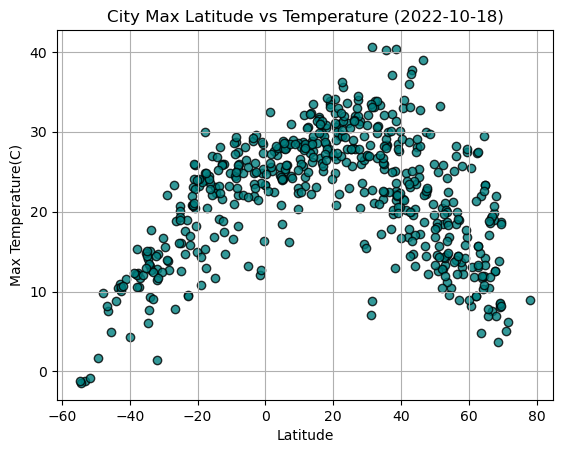

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis_lat = city_data_df['Lat']
y_axis_temp = city_data_df['Max Temp']
plt.scatter(x_axis_lat, y_axis_temp, marker='o', facecolors='teal', edgecolors='black', alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Max Latitude vs Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

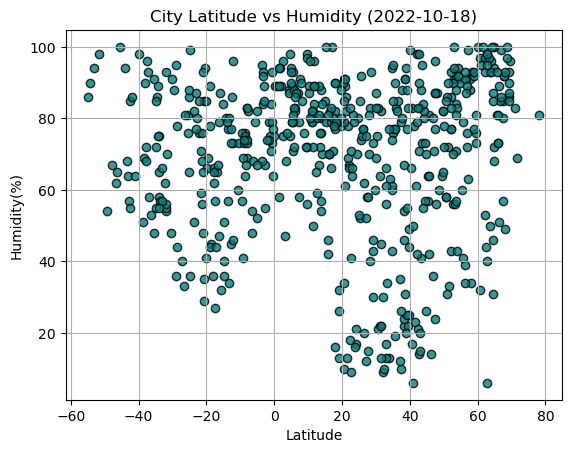

In [9]:
# Build the scatter plots for latitude vs. humidity
y_axis_humidity = city_data_df['Humidity']
plt.scatter(x_axis_lat, y_axis_humidity, marker = 'o', facecolors='teal', edgecolors='black', alpha = 0.8)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs Humidity (2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

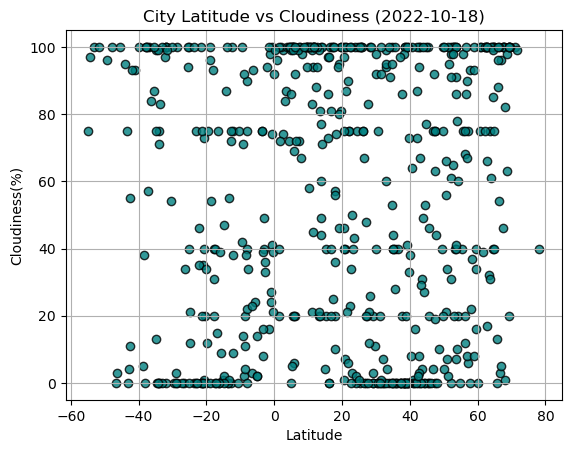

In [10]:
# Build the scatter plots for latitude vs. cloudiness
y_axis_cloudiness = city_data_df['Cloudiness']
plt.scatter(x_axis_lat, y_axis_cloudiness, marker = 'o', facecolors='teal', edgecolors='black', alpha = 0.8)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs Cloudiness (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

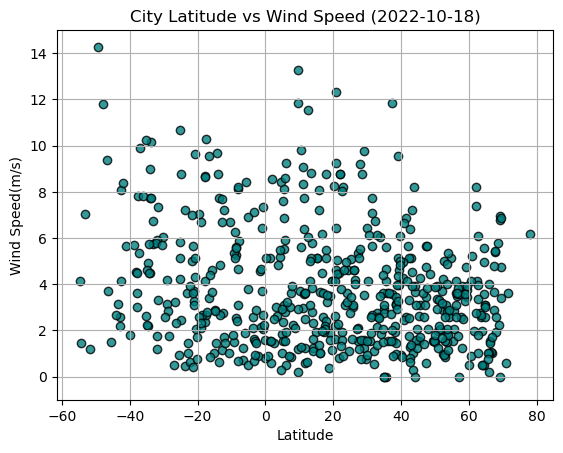

In [11]:
# Build the scatter plots for latitude vs. wind speed
y_axis_wind = city_data_df['Wind Speed']
plt.scatter(x_axis_lat, y_axis_wind, marker = 'o', facecolors='teal', edgecolors='black', alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs Wind Speed (2022-10-18)')
plt.ylim(-1,15)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regress (x_values, y_values):
    #calculate regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = slope*x_values + intercept
    line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    print(f'The r-value is: {rvalue}')
    #plot the scatter
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq,(10,30), fontsize = 15, color = 'red')
    plt.xlabel('Latitude')
    plt.ylabel('y_values')
    plt.show
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ust-nera,64.5667,143.2000,29.42,31,40,3.58,RU,1689903008
3,nova sintra,14.8667,-24.7167,23.08,85,4,1.93,CV,1689903008
4,skeldon,5.8833,-57.1333,25.06,88,6,2.79,GY,1689903009
5,ilulissat,69.2167,-51.1000,8.01,93,20,0.00,GL,1689903009
10,barah,13.7000,30.3667,28.87,54,44,5.78,SD,1689903011


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.76,86,100,10.69,PN,1689903007
2,edinburgh of the seven seas,-37.0676,-12.3116,11.71,58,100,9.91,SH,1689902829
6,port-aux-francais,-49.3500,70.2167,1.71,54,96,14.29,TF,1689903010
7,invercargill,-46.4000,168.3500,7.57,65,3,3.72,NZ,1689902776
8,punta arenas,-53.1500,-70.9167,-1.22,94,100,7.04,CL,1689903010


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6135869371234128


Text(0, 0.5, 'Max Temp')

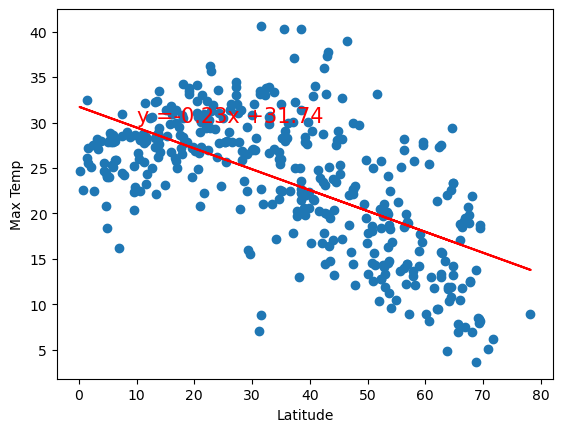

In [15]:
# Linear regression on Northern Hemisphere
regress (northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.ylabel('Max Temp')

The r-value is: 0.799085977678355


Text(0, 0.5, 'Max Temp')

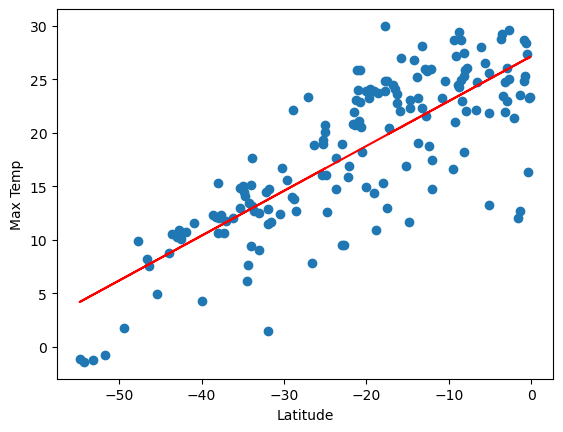

In [24]:
# Linear regression on Southern Hemisphere
regress (southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.ylabel('Max Temp')

The graph depicting the relationship between Latitude and Max Temp in the Northern Hemisphere shows that as Latitude increases, the max temp decreases. In the Southern Hemisphere, the opposite relationship can be seen where as Latitude increases, the max temp increases. Since we know that 0 is the equator and 90/-90 are the poles, we can see that the closer we get to the equator, the higher the max temp will be and it seems to max out at just under 50 degrees celcius.

### Humidity vs. Latitude Linear Regression Plot

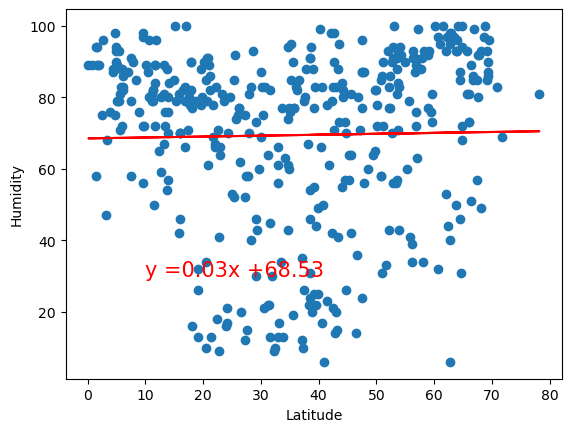

In [18]:
# Northern Hemisphere
regress (northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.ylabel('Humidity')

The r-value is: -0.04057140754577149


Text(0, 0.5, 'Humidity')

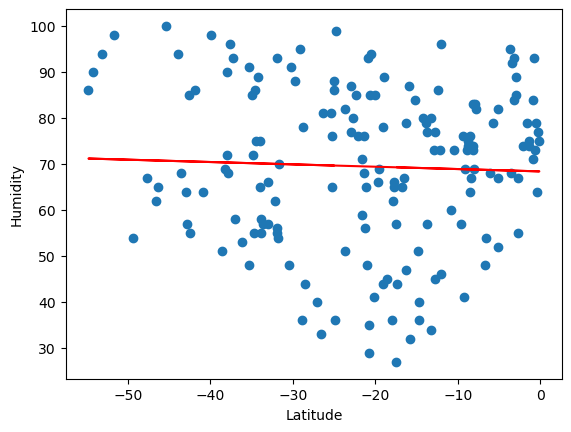

In [19]:
# Southern Hemisphere
regress (southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.ylabel('Humidity')

For both the northern and southern hemisphere, we can see that there is little to no relationship between Latitude and Humidity. This tells us there may be other factors that affect humidity such as the city's proximity to water or how much sun light it gets.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.08287337233196734


Text(0, 0.5, 'Cloudiness')

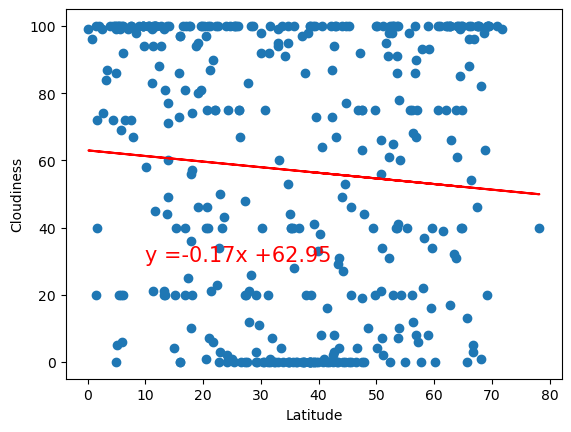

In [20]:
# Northern Hemisphere
regress (northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness')

The r-value is: -0.20549626371192478


Text(0, 0.5, 'Cloudiness')

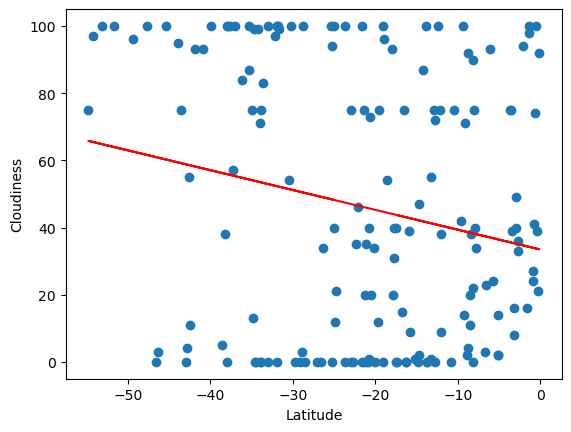

In [21]:
# Southern Hemisphere
regress (southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness')

In the Southern hemisphere, as we get closer to the equator, cloudiness decreases whereas in the Northern hemisphere, as we get farther from the equator, cloudiness decreases. This could mean the closer nwe get to the north pole, the cloudier it gets.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.16681109643551367


Text(0, 0.5, 'Wind Speed')

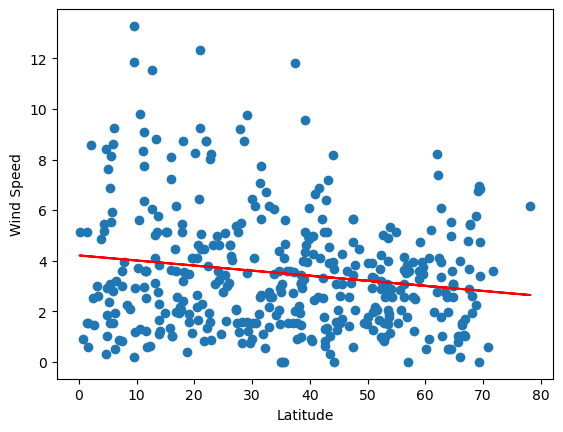

In [22]:
# Northern Hemisphere
regress (northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed')

The r-value is: -0.23066825480644898


Text(0, 0.5, 'Wind Speed')

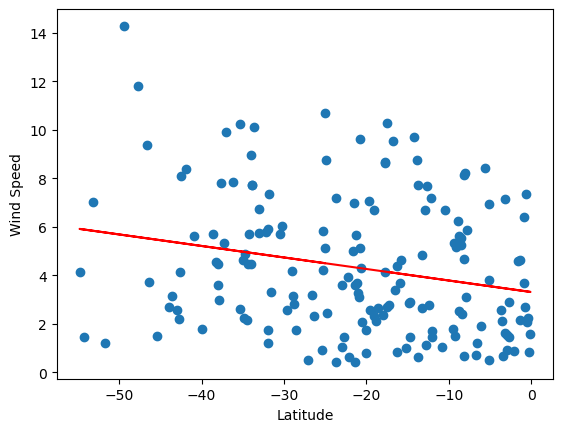

In [23]:
# Southern Hemisphere
regress (southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed')

Both Norther and Southern hemisphere show a decreasing linear relationship. In the Northern hemisphere, the closer we get to the equator, the higher the wind speed whereas in the Souther Hemisphere, the closer we get to the equator, the lower the wind speed is although, the change is very minimal.